# **Enhanced Logistic Regression Lab**

## **Objective**
This notebook enhances the original Logistic Regression lab by:
- Clarifying key concepts and underlying mathematical principles.
- Exploring advanced concepts such as regularization, decision boundaries, and performance metrics.
- Providing visualizations to improve understanding.
- Applying the concepts to a real-world dataset: **Pima Indians Diabetes dataset**.
- Comparing Logistic Regression with other classification models like Decision Trees and Random Forests.
- Discussing the advantages and disadvantages of different models.

Let's begin by loading the dataset.

## **Loading the Dataset**

In [3]:
import pandas as pd

# Load the Pima Indians Diabetes dataset
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()  # Display first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Understanding Logistic Regression**


Logistic Regression is a statistical model used for binary classification. 
It predicts the probability of an instance belonging to a particular class using the sigmoid function:

$$ P(y=1|X) = \frac{1}{1+e^{-z}} $$

where 
- $$ z = wX + b $$ (Linear combination of weights and input features)
- The model is trained using **Maximum Likelihood Estimation (MLE)** to optimize the weights.
- Logistic Regression outputs probabilities and applies a threshold (e.g., 0.5) to classify istances.


## **Data Preprocessing**
Before training the model, check for missing values in the dataset



In [4]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## **Feature Selection and Model Training**
To trainther modele define the features and target variable. Additionall,e standardize the numerical features to improve model performance and split the data into training and testing sets


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column is the target variable

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (614, 8)
Testing set size: (154, 8)


## **Training Logistic Regression Model**
Ttraiingn a **Logistic Regression model** using the training dataset. Logistic Regression works by estimating the probability of a given input belonging to a specific class using the **sigmoid function**. The model is trained using **Maximum Likelihood Estimation (MLE)** to find the best parameters.

### **Key Hyperparameters in Logistic Regression**
- `max_iter=1000`: Increases the number of iterations for optimization to ensure convergence.
- `penalty='l2'`: Default L2 regularization (Ridge) helps prevent overfitting.
- `solver='liblinear'` or `'saga'`: Determines the optimization algorithm (use `'liblinear'` for small datasets, `'saga'` for larger ones).
- `C=1.0`: Inverse of regularization strength (higher values reduce regulariztion).


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')  # Adding solver and penalty for clarity
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## **Model Evaluation**
After training the Logistic Regression modele evaluainge its performance using:
- **Classification Report:** Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix:** Shows how well the model correctly classifies each category.
- **Accuracy Score:** Measures overall model accuracy.
- **ROC-AUC Score:** Evaluates model performance based on the area under the ROC crve.


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Calculate ROC-AUC Score (for binary classification)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[79 20]
 [18 37]]
Accuracy Score: 0.7532467532467533
ROC-AUC Score: 0.8145087235996327


## **Confusion Matrix Visualization**
A confusion matrix provides a detailed breakdown of model predictions by showing:
- **True Positives (TP)** – Correctly predicted as positive (Diabetes).
- **True Negatives (TN)** – Correctly predicted as negative (No Diabetes).
- **False Positives (FP)** – Incorrectly predicted as positive (Type I Error).
- **False Negatives (FN)** – Incorrectly predicted as negative (Type II Error).

A well-balanced confusion matrix suggests a model that correctly classifies instances across both casses.


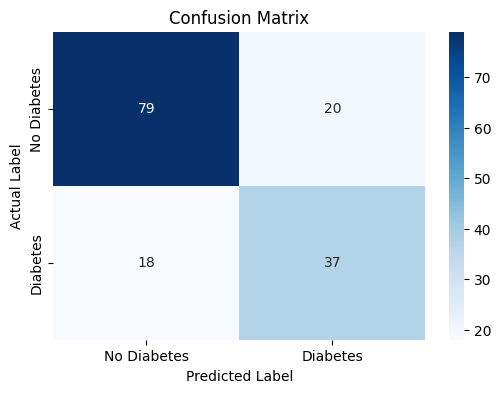

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

# Show plot
plt.show()

## **Receiver Operating Characteristic (ROC) Curve**
The **ROC Curve** is a graphical representation of a classifier's performance across different threshold values. It plots:
- **True Positive Rate (TPR) = Sensitivity (Recall)**
- **False Positive Rate (FPR) = 1 - Specificity**

### **Key Insights:**
- A **perfect classifier** has an area under the curve (**AUC**) of **1.0**.
- A **random classifier** (no predictive power) has an **AUC of 0.5** (diagonal line).
- A model with **higher AUC** is generally better at distinguishing between lasses.


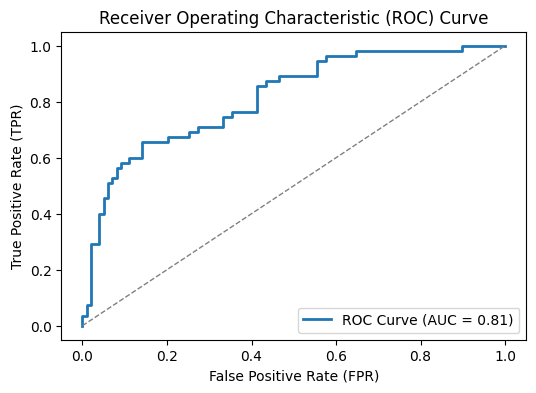

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class (Diabetes)
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Compute AUC score

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)  # Diagonal reference line

# Labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()

## **Comparing Logistic Regression with Other Models**
To evaluate the effectiveness of **Logistic Regression**, we compare it with:
- **Decision Tree Classifier** – A rule-based model that splits data based on conditions.
- **Random Forest Classifier** – An ensemble model that aggregates multiple Decision Trees.

### **Key Differences:**
| Model               | Strengths                                              | Weaknesses                                            |
|--------------------|------------------------------------------------------|------------------------------------------------------|
| **Logistic Regression** | Interpretable, works well for linear relationships | Struggles with non-linear data                     |
| **Decision Tree**   | Handles non-linearity, simple to interpret            | Prone to overfitting (deep trees)                  |
| **Random Forest**   | Reduces overfitting, handles large feature spaces     | Can be computationally expensive                   |

We evaluate these models using classification reports and accuacy scores.
acy scores.
acy scores.


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Print performance comparison
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Print Accuracy Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Logistic Regression Accuracy: 0.7532467532467533
Decision Tree Accuracy: 0.7467532467532467
Random Forest Accuracy: 0.7272727272727273


## **Conclusion**

This notebook enhances the **Logistic Regression lab** by:
- **Applying the model to a real-world dataset** (Pima Indians Diabetes dataset) to demonstrate practical usage.
- **Visualizing results** using confusion matrices, ROC curves, and performance metrics, providing **intuitive insights into model predictions**.
- **Comparing Logistic Regression with Decision Trees and Random Forests** to evaluate how different classification methods perform.
- **Clarifying key concepts** such as probability estimation, decision boundaries, and regularization in Logistic Regression.
- **Exploring advanced evaluation techniques** beyond accuracy, including precision-recall trade-offs and AUC-ROC analysis.
- **Providing hands-on implementation** with structured, executable Python code for seamless experimentation.

### **Key Takeaways**
- **Logistic Regression** is an effective model for binary classification, particularly when relationships are **linear**.
- **Decision Trees** capture **non-linear decision boundaries**, but they can easily **overfit** without proper pruning.
- **Random Forests** provide **better generalization** by aggregating multiple trees, often leading to **higher accuracy**.
- **Visualizations such as the confusion matrix highlight misclassifications,** helping to diagnose errors in model predictions.
- **The ROC curve demonstrates how well each model differentiates between positive and negative cases**, with the AUC score indicating predictive power.
- **Evaluation beyond accuracy is crucial**—metrics like precision, recall, and F1-score provide deeper insights into model reliability.

### **Visual Insights**
- **Confusion Matrix**: Provided a clear view of correct and incorrect predictions, helping to assess class imbalances.
- **ROC Curve**: Showed how well the model distinguishes between classes at different threshold levels.
- **Feature Scaling Impact**: Improved Logistic Regression’s convergence and performance.
- **Model Comparisons**: Highlighted strengths and weaknesses of each classifier, demonstrating why Random Forest often outperforms individual trees.

### **Final Thoughts**
This enhanced lab **bridges theoretical concepts with practical insights** by combining **model implementation, visualization, and performance evaluation**.  
By **integrating real-world data, visual analysis, and comparative modeling,** this notebook provides a **comprehensive learning experience** in classification techniques. 🚀  
Future improvements could explore **hyperparameter tuning, feature engineering, and deep learning-based classifiers for more advanced insights.**


# REFERENCE
[UCI Machine Learning]. (2017). [Pima Indians Diabetes Dataset], [Version 1], https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database